16.09.2024
## TD1 – Structures et quantification

### I. Arrondi et troncature

Créer des fonctions **arr=arrondi(val,MAXI,B)** et **tronc=troncature(val, MAXI,B)** qui renvoient 
respectivement les valeurs arrondies et tronquées sur (**B**+1) bits d’un vecteur ligne de valeurs 
réelles val qui ne devraient pas dépasser la valeur **MAXI** en valeur absolue.

Les vecteurs renvoyés pour chacune des 2 fonctions seront les valeurs numériques quantifiées (entières) multiples de Delta_q (round, floor). 
Pour vérifier leur exactitude, vous pourriez tracer pour *x* 𝜖[−1.4;1.4] (tickslabels pour les multiples de Delta_q).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def arrondi(val, MAXI, B):
    Delta_q = MAXI * 2**(-(B))  # Step size
    return np.round(val / Delta_q) * Delta_q

def troncature(val, MAXI, B):
    Delta_q = MAXI * 2**(-(B))  # Step size
    return np.floor(val / Delta_q) * Delta_q


val = np.linspace(-1.4, 1.4, 100)  # Vector
MAXI = 1
val_n = val / MAXI
B = 2

arr = arrondi(val_n, MAXI, B)
tronc = troncature(val_n, MAXI, B)

In [3]:
def quantize_arrondi_troncature(val, maxi, B):
    # Initialisation
    rond = np.zeros_like(val)
    tronc = np.zeros_like(val)
    ind = np.arange(len(val))  # indices
    pas = 1 / 2**B
    Nmax = 2**B

    # Normalisation
    val_norm = val / maxi

    # Suppression des valeurs hors de la plage
    K = np.where(val_norm < -1 + pas / 2)[0]
    rond[K] = -1 * maxi
    tronc[K] = -1 * maxi
    ind = np.delete(ind, K)  # Supprime les indices traités

    K = np.where(val_norm[ind] > 1 - pas)[0]
    rond[ind[K]] = (1 - pas) * maxi
    tronc[ind[K]] = (1 - pas) * maxi
    ind = np.delete(ind, K)  # Supprime les indices traités

    # Arrondi pour les valeurs restantes
    rond[ind] = np.round(Nmax * val_norm[ind]) / Nmax * maxi

    # Troncature pour les valeurs restantes
    tronc[ind] = np.floor(Nmax * val_norm[ind]) / Nmax * maxi

    return rond, tronc


# Application de la fonction pour obtenir l'arrondi et la troncature
rond, tronc = quantize_arrondi_troncature(val, MAXI, B)

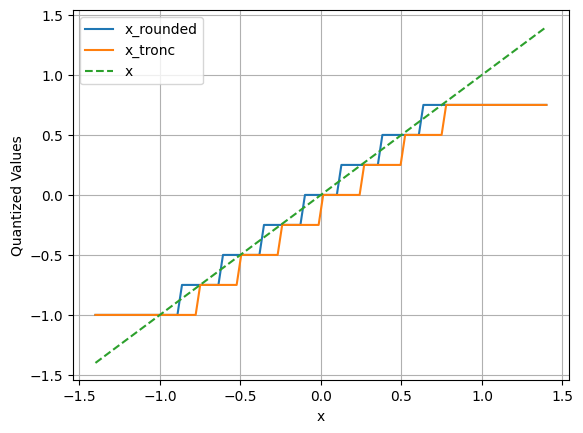

In [4]:
plt.plot(val_n, rond, label='x_rounded')
plt.plot(val_n, tronc, label='x_tronc')
plt.plot(val_n, val_n, label='x', linestyle = '--')
plt.xlabel('x')
plt.ylabel('Quantized Values')
plt.legend()
plt.grid(True)
plt.show()

### II. Structure bi-quad 

La cellule bi-quad est largement implémentée dans les systèmes numériques. Elle mérite donc d’être implémentée par vos soins. Créer la fonction **y=bi_quad(B,A,x)**. Vérifier son fonctionnement par exemple à l’aide des tracés suivants. Les tracés de référence sont calculés grâce à la commande **filter**.